# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

#1. Limiarização de Imagens

Nos vídeos abaixo, eu discuto o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
import numpy as np
import cv2
import time

# A tecla 'esc' fecha o programa
ESCAPE_KEY_ASCII = 27

# Callback para a trackbar
def onChange(value):
    _, img = cv2.threshold(copyimg, value, 255, cv2.THRESH_BINARY)
    cv2.imshow(windowTitle, img)

# Imagem carregada e sua cópia
img = cv2.imread("maxresdefault.png", 0)
copyimg = img.copy()

# Cria janela gráfica para inserir a imagem
windowTitle = "Ajuste do Threshold"

cv2.namedWindow(windowTitle,cv2.WINDOW_GUI_NORMAL)
cv2.resizeWindow('image', 1200,600)

# Cria trackbar e inicia exatamente no meio
cv2.createTrackbar("threshold", windowTitle, int (255/2), 255, onChange)

#_, img = cv2.threshold(copyimg, int (255/2), 255, cv2.THRESH_BINARY)
cv2.imshow(windowTitle, img)

counter_time = 0
while True:
    # Espera até que a tecla esc seja pressionada
    keyPressed = cv2.waitKey(1) & 0xFF
    
    if keyPressed == ESCAPE_KEY_ASCII:
        break

    # Para não afogar o processador com o looping, dorme por um centésimo de segundo
    # como a aplicação não é tão sensível ao tempo, não faz muito sentido rodar o loop 
    # indefinidamente se nada foi feito
    time.sleep(0.01)

cv2.imwrite("Imagem.png", img)
cv2.destroyAllWindows()

#2. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>

Explique com suas palavras no áudio qual foi o efeito e quando cada filtro deve ser aplicado.

Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

Digite o nome da imagem: espd-25.jpg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


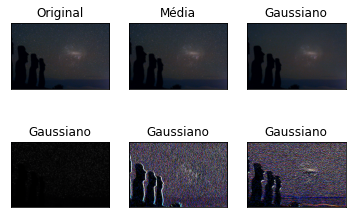

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def filtro(img, filtro):
    if (filtro == "media"):
        return cv2.blur(img,(5,5))
    if (filtro == "gaussiano"):
        return cv2.GaussianBlur(img,(5,5),0)
    if (filtro == "mediana"):
        return cv2.medianBlur(img,5)
    if (filtro == "laplaciano"):
        return cv2.Laplacian(img,cv2.CV_8U)
    if (filtro == "sobel"):
        return (cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5), cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5))

def mostra(img, titulo, seq):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,seq),plt.imshow(img,cmap = 'gray')
    plt.title(titulo), plt.xticks([]), plt.yticks([])

imgName = input("Digite o nome da imagem: ")

img = cv2.imread(imgName)

if (type(img) is np.ndarray): 
  mostra(img, "Original", 1)
  mostra(filtro(img, "media"), "Média", 2)
  mostra(filtro(img, "gaussiano"), "Gaussiano", 3)
  mostra(filtro(img, "mediana"), "Gaussiano", 3)
  mostra(filtro(img, "laplaciano"), "Gaussiano", 4)
  mostra(filtro(img, "sobel")[0], "Gaussiano", 5)
  mostra(filtro(img, "sobel")[1], "Gaussiano", 6)
else:
  print("Erro ao ler a imagem")

#3. Recapitulação

Acesse o SIGAA e no fórum "Recapitulação do Primeiro Mês", responda as seguintes perguntas com suas palavras:

* O que é o Processamento de Imagens?
* O que são modelos de cor (exemplo: RGB, HSV) e para que servem?
* Liste conhecimentos que você aprendeu até aqui e exemplo de uso dos mesmos.
